In [2]:
import glob 
import cv2
import numpy as np
from matplotlib import pyplot as plt



In [3]:
path = 'array.npy'
path = 'test_4k_uv_beach.npy'
arr = np.load(path)

In [4]:
arr = arr[2:]

(2882, 2, 2)


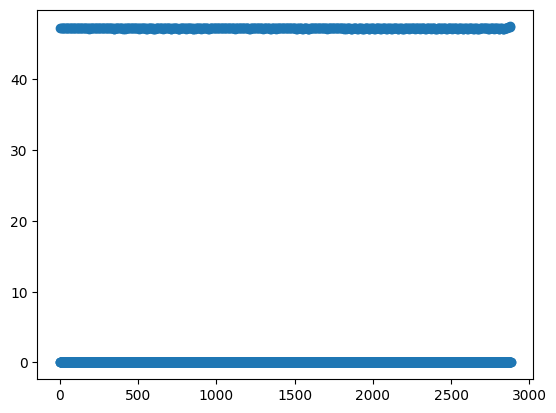

In [5]:
print(arr.shape)
plt.scatter(np.arange(arr.shape[0]),arr[:,0,1])

In [6]:
values = np.where(arr[:,0,1]!=0)
vals = arr[values]
print(vals.shape)

(576, 2, 2)


Text(0.5, 0, 'time')

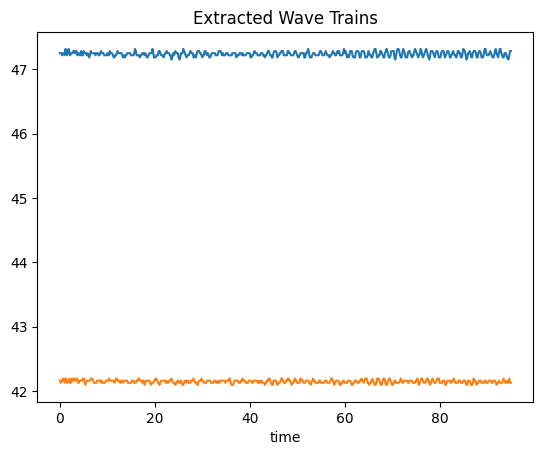

In [7]:

plt.plot(np.arange(vals[:-5,:,1].shape[0])/6,vals[:-5,:,1])
plt.title("Extracted Wave Trains")
plt.xlabel("time")

In [8]:
#get mean of both 
arr_centered = vals - np.mean(vals, axis = 0)
print(arr_centered)

[[[ 0.01576548  0.01135772]
  [ 0.02855635  0.0124476 ]]

 [[-0.00327208  0.01135772]
  [-0.00951878 -0.02059303]]

 [[-0.00327208  0.01135772]
  [-0.00951878  0.0124476 ]]

 ...

 [[ 0.01576548  0.14352024]
  [ 0.00951878  0.14461012]]

 [[ 0.01576548  0.17656087]
  [ 0.02855635  0.17765075]]

 [[ 0.03480305  0.24264213]
  [ 0.04759391  0.21069138]]]


(-1.0, 1.0)

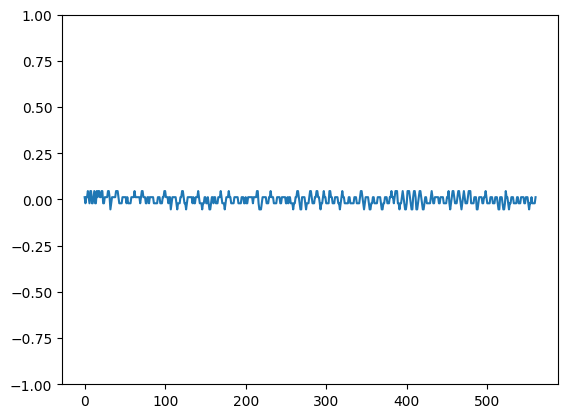

In [9]:
plt.plot(arr_centered[:-15,1,1])
plt.ylim((-1,1))


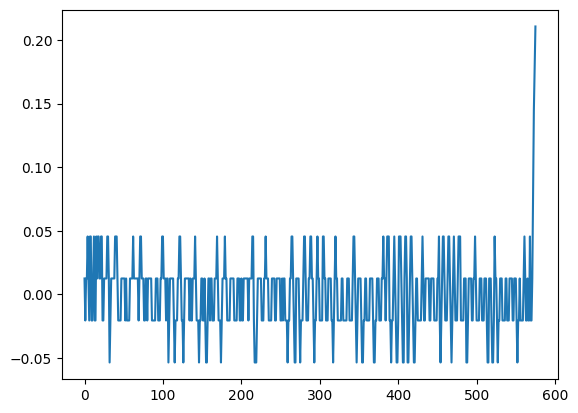

In [10]:
plt.plot(arr_centered[:,1,1])

[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.         1.16666667 1.33333333 1.5       ]
(3, 576)


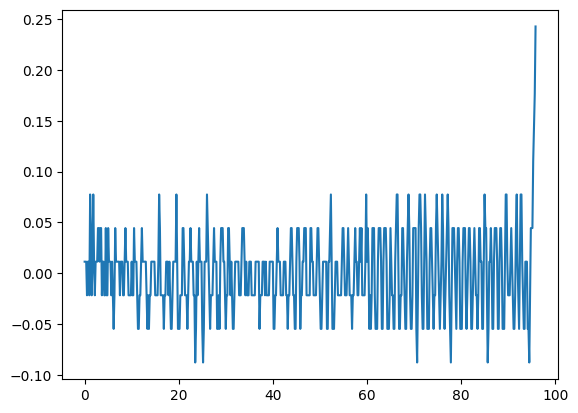

In [11]:
arr_time = np.arange(arr_centered.shape[0])/6
print(arr_time[0:10])
time_y_domain = np.vstack((arr_centered[:,0,1],arr_centered[:,1,1],arr_time))
print(time_y_domain.shape)
plt.plot(time_y_domain[2,:],time_y_domain[0,:])


In [12]:
new_arr = time_y_domain.T
np.save('array3.npy', new_arr)

In [18]:
print(new_arr.shape)

(770, 3)


In [13]:
time_y_domain = np.reshape(time_y_domain,(time_y_domain.shape[1],time_y_domain.shape[0]))

In [14]:
print(time_y_domain.shape[0])

770


In [15]:
print(time_y_domain[:3])

[[-0.02320957 -0.02320957 -0.02320957]
 [-0.05818289 -0.05818289  0.01176375]
 [ 0.01176375  0.01176375  0.01176375]]


In [7]:
#load in images that we care about :
images = glob.glob(path) 
img_arr = []
for fname in images:
    img = cv2.imread(fname)
    img_arr.append(img)

print(img_arr)

[array([[[  8,  13,  12],
        [  8,  13,  12],
        [  8,  13,  12],
        ...,
        [156, 139, 126],
        [156, 139, 126],
        [156, 139, 126]],

       [[  7,  12,  11],
        [  8,  13,  12],
        [  8,  13,  12],
        ...,
        [156, 139, 126],
        [156, 139, 126],
        [156, 139, 126]],

       [[  7,  12,  11],
        [  7,  12,  11],
        [  8,  13,  12],
        ...,
        [156, 139, 126],
        [156, 139, 126],
        [156, 139, 126]],

       ...,

       [[107,  96,  92],
        [107,  96,  92],
        [107,  96,  92],
        ...,
        [111, 113, 113],
        [111, 113, 113],
        [111, 113, 113]],

       [[107,  96,  92],
        [107,  96,  92],
        [107,  96,  92],
        ...,
        [111, 113, 113],
        [111, 113, 113],
        [111, 113, 113]],

       [[107,  96,  92],
        [107,  96,  92],
        [107,  96,  92],
        ...,
        [111, 113, 113],
        [111, 113, 113],
        [111, 113, 113]

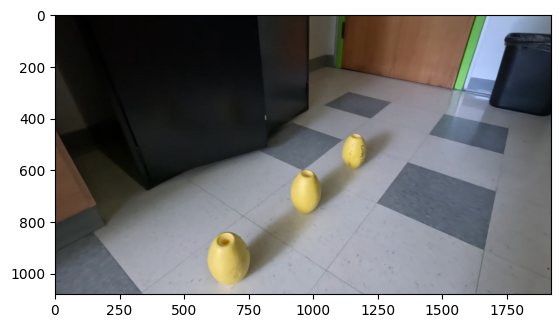

points finalized


AxisError: axis 1 is out of bounds for array of dimension 1

In [14]:
import orthorec_06_03_2024 as orth

for frame in img_arr:
    points = orth.pick_points(frame)
    old_points = np.array(points, dtype=np.float32)
    old_points = orth.order_points(old_points)  

    new_points = np.array([[0,0],[old_points[-1,0],0],[0,old_points[-1,1]],old_points[-1]], dtype=np.float32)
    rectified = orth.rectify(img, old_points, new_points)
    plt.figure()
    plt.imshow('Rectified Image', rectified)
    